In [51]:
import csv

In [52]:
import numpy as np

In [77]:
authors={}
authors["all"]=np.array([])
with open('pr-stats.csv') as cvsfile:
    r = csv.DictReader(cvsfile)
    for row in r:
        lead_time=float(row["lead time in days"])
        authors["all"]=np.append(authors["all"],lead_time)
        author=row["author"]
        if (not author in authors):
          authors[author]=np.array([])
        authors[author]=np.append(authors[author],lead_time) 

In [100]:
def printStat(author):
    array=authors[author]
    print("{:5d} PRs for {:20s} Lead times : max {:7.2f} mean {:7.2f} stddev {:7.2f}".format(np.size(array),author,np.max(array),np.mean(array),np.mean(array)))
printStat("all")
printStat("davidrohr")
printStat("shahor02")
printStat("aalkin")
printStat("aphecetche")
printStat("ktf")
printStat("dstocco")

 1100 PRs for all                  Lead times : max   91.37 mean    3.73 stddev    3.73
  122 PRs for davidrohr            Lead times : max    5.74 mean    0.68 stddev    0.68
  158 PRs for shahor02             Lead times : max   10.61 mean    0.79 stddev    0.79
   33 PRs for aalkin               Lead times : max   12.18 mean    2.81 stddev    2.81
   33 PRs for aphecetche           Lead times : max   40.77 mean    5.58 stddev    5.58
  151 PRs for ktf                  Lead times : max   91.37 mean    2.50 stddev    2.50
   13 PRs for dstocco              Lead times : max   12.68 mean    2.74 stddev    2.74


In [84]:
import matplotlib.pyplot as plt

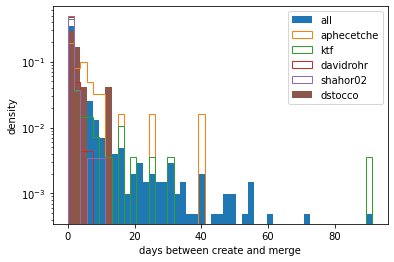

In [105]:
x_min=np.min(delays)
x_max=np.max(delays)
density=True
n,bins,patches=plt.hist(x=authors["all"],bins=np.linspace(x_min,x_max),rwidth=1.0,label="all",density=density,histtype='stepfilled')
plt.xlabel("days between create and merge");
plt.ylabel("density");
plt.yscale("log")
plt.hist(x=authors["aphecetche"],bins=bins,rwidth=0.85,label="aphecetche",density=density,histtype='step');
plt.hist(x=authors["ktf"],bins=bins,rwidth=0.85,label="ktf",density=density,histtype='step');
plt.hist(x=authors["davidrohr"],bins=bins,rwidth=0.85,label="davidrohr",density=density,histtype='step');
plt.hist(x=authors["shahor02"],bins=bins,rwidth=0.85,label="shahor02",density=density,histtype='step');
plt.hist(x=authors["dstocco"],bins=bins,rwidth=0.85,label="dstocco",density=density,histtype='stepfilled');
plt.legend();